In [1]:
# Import packages
from tools.to_read import *
from tools.to_plot import *
from tools.to_do import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Set up
root = '/home/jacoponudo/Documents/Size_effects/'
platforms = ['gab', 'reddit', 'twitter', 'usenet', 'voat', 'facebook']
unique_counts = {}
temporal_ranges = {}

for platform in tqdm(platforms):
    # Carica i dati
    data = pd.read_parquet(root + 'DATA/' + platform + '/' + platform + '_raw_data.parquet', columns=columns_to_read[platform])
    data.columns = standard_columns
    df = data
    df['created_at'] = pd.to_datetime(df['timestamp'])
    
    # Crea una tabella di conteggio per ogni colonna
    unique_counts[platform] = {col: df[col].nunique() for col in df.columns}
    
    # Calcola il range temporale
    temporal_ranges[platform] = {
        'start_date': df['created_at'].min(),
        'end_date': df['created_at'].max()
    }

# Crea il DataFrame con i risultati
unique_counts_df = pd.DataFrame(unique_counts).T
unique_counts_df.index.name = 'Piattaforma'
unique_counts_df.fillna(0, inplace=True)  # Sostituisci NaN con 0 se ci sono colonne mancanti in alcune piattaforme

# Crea il DataFrame per i range temporali
temporal_ranges_df = pd.DataFrame(temporal_ranges).T
temporal_ranges_df.index.name = 'Piattaforma'

# Unisci i risultati e visualizza
results_df = pd.concat([unique_counts_df, temporal_ranges_df], axis=1)
print(results_df)


/home/jacoponudo/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
100%|██████████| 6/6 [02:59<00:00, 29.90s/it]

             post_id   user_id  timestamp  created_at  \
Piattaforma                                             
gab          3764443    166833   12509891    12509891   
reddit         80816    394733    1798628     1798628   
twitter       325451  13620442   22337801    22337801   
usenet        682362    212259    3566773     3566773   
voat          413854    153255    3454791     3454791   
facebook     1000000  17700372   39732512    39732512   

                            start_date                   end_date  
Piattaforma                                                        
gab          2016-08-10 16:25:26+00:00  2018-10-29 03:03:58+00:00  
reddit       2018-01-01 00:04:24+00:00  2022-12-12 15:28:28+00:00  
twitter            2010-01-23 00:22:57        2023-01-25 22:57:48  
usenet       1989-02-13 23:16:55+00:00  2013-06-25 21:51:41+00:00  
voat         2013-11-21 21:45:00+00:00  2020-12-25 18:58:59+00:00  
facebook     2009-12-31 01:05:49+00:00  2016-08-15 19:13:04+00:00  

In [6]:

results_df = pd.concat([unique_counts_df, temporal_ranges_df], axis=1)


In [17]:
results_df.reset_index()

,Piattaforma,post_id,user_id,timestamp,created_at,start_date,end_date
0,gab,3764443,166833,12509891,12509891,2016-08-10,2018-10-29
1,reddit,80816,394733,1798628,1798628,2018-01-01,2022-12-12
2,twitter,325451,13620442,22337801,22337801,2010-01-23,2023-01-25
3,usenet,682362,212259,3566773,3566773,1989-02-13,2013-06-25
4,voat,413854,153255,3454791,3454791,2013-11-21,2020-12-25
5,facebook,1000000,17700372,39732512,39732512,2009-12-31,2016-08-15


In [18]:
results_df['start_date'] = results_df['start_date'].astype(str).str.slice(0, 10)

results_df['end_date'] = results_df['end_date'].astype(str).str.slice(0, 10)

results_df=results_df.reset_index()

In [22]:
import pandas as pd

# Store the selected columns to clipboard
results_df[['Piattaforma','user_id', 'post_id', 'timestamp', 'start_date', 'end_date']].to_clipboard(index=False)


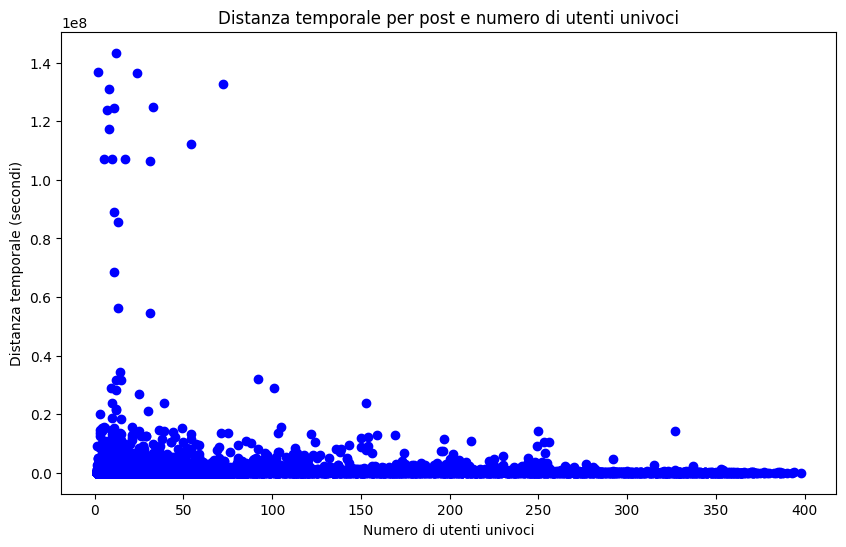

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carica i dati (assumendo che il tuo dataset sia già in un DataFrame chiamato df)
df =data

# Assicurati che 'created_at' sia in formato datetime
df['created_at'] = pd.to_datetime(df['timestamp'])

# Calcola la distanza temporale per ogni coppia (user_id, post_id)
df_sorted = df.sort_values(by=['user_id', 'post_id', 'created_at'])
df['time_diff'] = df.groupby(['user_id', 'post_id'])['created_at'].transform(lambda x: (x.max() - x.min()).total_seconds())

# Calcola il numero di utenti univoci per ogni post_id
unique_users_per_post = df.groupby('post_id')['user_id'].nunique().reset_index(name='unique_users')

# Calcola la distanza temporale per ogni post_id (media o altro aggregato, se necessario)
time_diff_per_post = df.groupby('post_id')['time_diff'].max().reset_index()

# Unisci i due DataFrame per avere entrambe le informazioni
merged = pd.merge(time_diff_per_post, unique_users_per_post, on='post_id')

# Crea un plot
plt.figure(figsize=(10, 6))
plt.scatter(merged['unique_users'], merged['time_diff'], color=palette[platform])
plt.xlabel('Numero di utenti univoci')
plt.ylabel('Distanza temporale (secondi)')
plt.title('Distanza temporale per post e numero di utenti univoci')
plt.yscale('log')
plt.show()



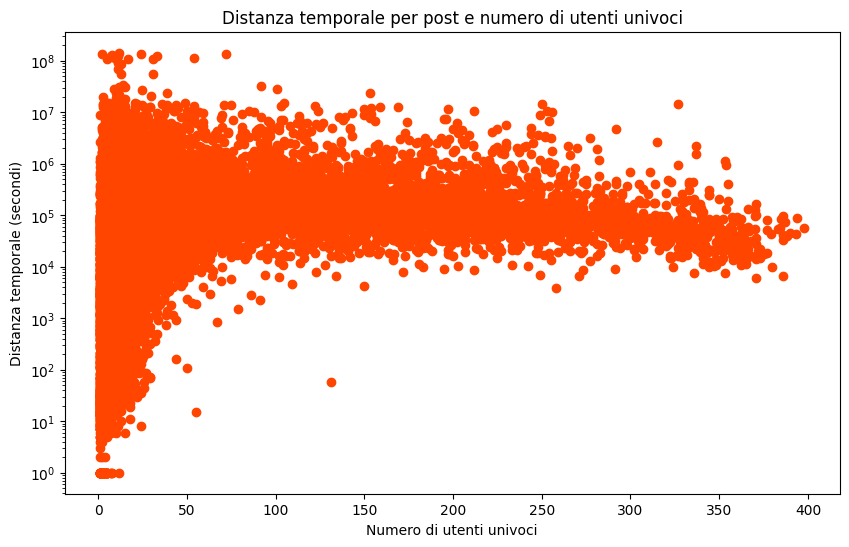

In [7]:
# Crea un plot
plt.figure(figsize=(10, 6))
plt.scatter(merged['unique_users'], merged['time_diff'], color=palette[platform])
plt.xlabel('Numero di utenti univoci')
plt.ylabel('Distanza temporale (secondi)')
plt.title('Distanza temporale per post e numero di utenti univoci')
plt.yscale('log')
plt.show()
